In [48]:
import pandas as pd
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import lab_tools

In [49]:
b = lab_tools.load_data('../data/week2/B/B_alot.csv')
c = lab_tools.load_data('../data/week2/C/C_3.csv')
d = lab_tools.load_data('../data/week2/D/D_3.csv')
e = lab_tools.load_data('../data/week2/E/E_3.csv')
materials = {
    'B': b,
    'C': c,
    'D': d,
    'E': e
    
}


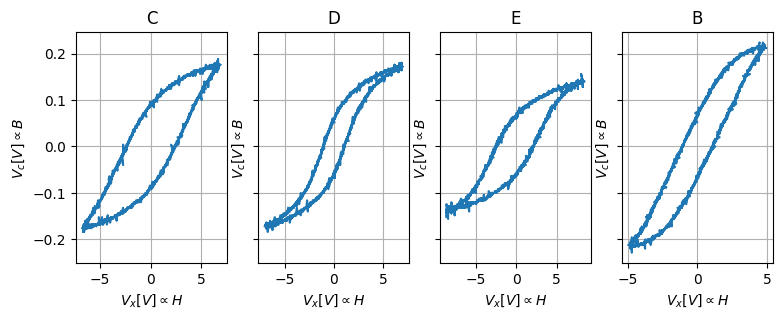

In [52]:
def show_multiple_graphs(d):
    fig, axs = plt.subplots(1, 4, figsize=(9, 3), sharey=True)
    for n, (k, v) in enumerate(d.items()):
        axs[n-1].plot(v['x'], v['y'])
        axs[n-1].set_title(k)
        axs[n-1].grid()
        axs[n-1].set_xlabel(r'$V_{x} [V] \propto H$')
        axs[n-1].set_ylabel(r'$V_{c} [V] \propto B$')

show_multiple_graphs(materials)
plt.savefig('../../graphs/part_1.svg', format='svg')

In [4]:
## get the hardness of the material
materials_properties = pd.DataFrame(
    {'material': ['B', 'C', 'D', 'E'],}
)
materials_properties

,material
0,B
1,C
2,D
3,E


In [15]:
# find hardness of the materials 
def find_hardness(xaxis,yaxis):
    positivezero,negativezero = lab_tools.findzeros(xaxis,yaxis)
    v = abs(positivezero[0] - negativezero[0]) / 2
    return v 

hardness_list_ = []
for k,v in materials.items():
    hardness_ = find_hardness(v['x'], v['y'])
    print(hardness_)
    hardness_list_.append(hardness_)
materials_properties['hardness'] = hardness_list_
    
materials_properties


1.12
2.3999999
1.08
2.40000005


,material,hardness
0,B,1.12
1,C,2.40
2,D,1.08
3,E,2.40


In [17]:
# find the area of the material
area_list_ = []
for k,v in materials.items():
    area_ = lab_tools.polyarea(v['x'], v['y'])
    print(area_)
    area_list_.append(area_)
materials_properties['power'] = area_list_
    
materials_properties

4.055520049171378
6.735520153073821
2.976320044143904
4.671200224922359


,material,hardness,power
0,B,1.12,4.05552
1,C,2.40,6.73552
2,D,1.08,2.97632
3,E,2.40,4.67120


In [18]:
print(materials_properties.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
material &  hardness &   power \\
\midrule
       B &      1.12 & 4.05552 \\
       C &      2.40 & 6.73552 \\
       D &      1.08 & 2.97632 \\
       E &      2.40 & 4.67120 \\
\bottomrule
\end{tabular}



/var/folders/wt/yw5gmc4d5_d4n1gg0kg1s9tr0000gn/T/ipykernel_19834/331503146.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(materials_properties.to_latex(index=False))


In [20]:
calibrate = lab_tools.load_data('../data/week2/calibration.csv')

array([ 13.8212885 , 314.39119304,  -1.13532027])

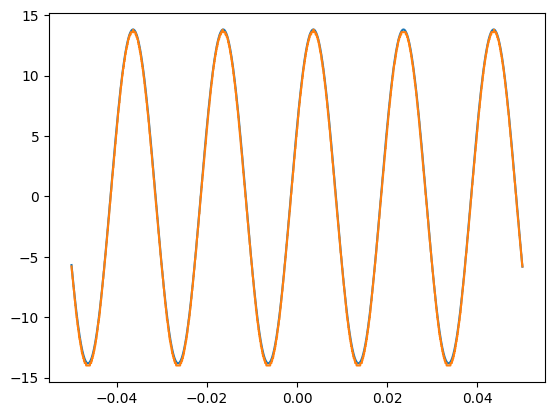

In [22]:
lab_tools.harmonic_fit(calibrate, x='t', y='x', a0=15, w0=313, p0=0)

In [ ]:
lab_tools.load_data('../data/week2/part5'

In [23]:
# https://www.vedantu.com/iit-jee/self-inductance-of-a-solenoid
L1 = 1996 # the inductance of the soloenoid
l = 6.7E-2 # the length of the solenoid in meters 
mu = 1.25E-6 # mu of copper
A = 4.5e-2 * 5.5e-2 # the area of the solenoid in meters squared

N = np.sqrt((L1 * l) / (A * mu))

# https://en.wikipedia.org/wiki/Magnetomotive_force
F = N * I


NameError: name 'y' is not defined

In [44]:
path = '../data/extension/first/'
path2 = '../data/extension/second/'
path3 = '../data/extension/3/'
# d = lab_tools.read_to_dict(path)
d = lab_tools.read_to_dict(path3)

[323.0769535946765, 229.09091604545452, 252.00000765, 307.3170825, 286.36364505681814, 331.5789574342105, 257.1428780685142]


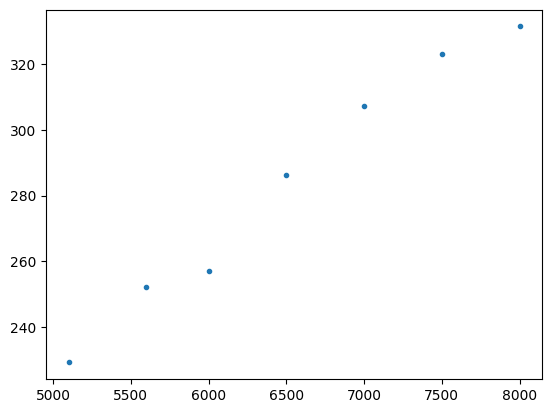

In [45]:
R = 10
modulus = []
freq = []

for k,v in d.items():
    y_1 = lab_tools.find_peak(v['x'],v['t'])[1] # after coil
    y_2 = lab_tools.find_peak(v['y'],v['t'])[1] # orginal
    modulus.append( R* (y_2 / y_1))
    freq.append(int(k))
    

plt.plot(freq, modulus, '.')
print(modulus)

In [29]:
d['2400'].hvplot.scatter(x='t', title='2400')

:NdOverlay   [Variable]
   :Scatter   [t]   (value)